In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [31]:
def get_roc_curve(y_test, y_pred_proba):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = 'ROC')
    plt.plot([0, 1], [0, 1], 'k-', label = 'Random')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

In [26]:
def get_best_cutoff(y_test, y_pred_proba):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    print('민감도 + 특이도의 최댓값 : ', np.max(tpr - fpr + 1))
    best_cutoff = threshold[np.argmax(tpr-fpr)]
    print('최고의 cutoff : ', best_cutoff)
    return best_cutoff

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic['Cabin'].fillna('N', inplace = True)
titanic['Embarked'].fillna('N', inplace = True)

In [7]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [9]:
target = titanic[['Survived']]
titanic.drop(['Survived', 'PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [10]:
titanic.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,N,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,N,S


In [11]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [12]:
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[0])
cabin_dummy = pd.get_dummies(titanic['Cabin'])

In [13]:
embarked_dummy = pd.get_dummies(titanic['Embarked'])

In [14]:
titanic = pd.concat([titanic, cabin_dummy, embarked_dummy], axis = 1)

In [15]:
titanic = pd.DataFrame(titanic, columns = titanic.columns)

In [16]:
titanic.drop(['Cabin', 'Embarked'], axis = 1, inplace = True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(titanic, target, test_size = 0.3, random_state = 42)

Logistic Regression

In [29]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)
y_pred_proba = lr_reg.predict_proba(X_test)[:, 1]

AUC :  0.8731279049750387


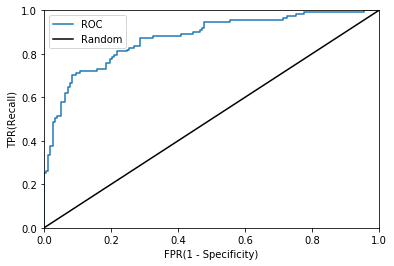

In [32]:
get_roc_curve(y_test, y_pred_proba)
print('AUC : ', roc_auc_score(y_test,y_pred_proba))

In [33]:
best_cutoff = get_best_cutoff(y_test, y_pred_proba)

민감도 + 특이도의 최댓값 :  1.6199001549320022
최고의 cutoff :  0.5845184418090659


In [40]:
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['Survived'])
y_pred_proba = (y_pred_proba['Survived'] >= best_cutoff) * 1
confusion_matrix(y_test, y_pred_proba)

array([[144,  13],
       [ 33,  78]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred_proba)

0.8283582089552238

Linear Regression

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_proba = lr_model.predict(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['Survived'])

AUC :  0.869570207149825


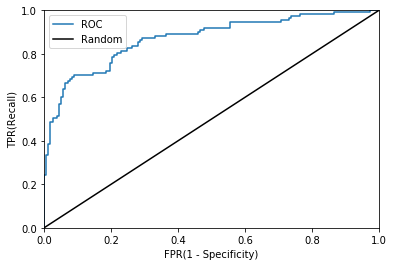

In [43]:
get_roc_curve(y_test, y_pred_proba)
print('AUC : ', roc_auc_score(y_test,y_pred_proba))

In [44]:
best_cutoff = get_best_cutoff(y_test, y_pred_proba)

민감도 + 특이도의 최댓값 :  1.6135307281804097
최고의 cutoff :  0.5864828117004376


In [45]:
y_pred = (y_pred_proba['Survived'] > best_cutoff) * 1

In [46]:
confusion_matrix(y_test, y_pred)

array([[143,  14],
       [ 34,  77]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.8208955223880597